//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:41: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Training Data Accuracy: 0.961904761905
Testing Data Accuracy: 1.0


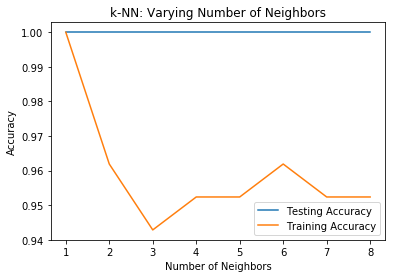

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jul  2 10:51:56 2017

@author: jerry
"""

from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris.data.shape

df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_target = pd.DataFrame(iris['target'], columns=['Target'])
df = pd.concat([df_data,df_target],axis=1)
#區分測試與訓練資料集
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,
                                                    test_size = 0.3,
                                                    random_state=42)
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)
print('Training Data Accuracy:',knn.score(X_train, y_train))
print('Testing Data Accuracy:',knn.score(X_test, y_test))


##############Overfitting and underfitting
# Setup neighbors
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
